# Welcome to this incredible analysis!
In these trying times, we are all seeking to find solace in each other's company. Where we used to mingle and dance very close to each other, we now release steam through virtual gatherings using platforms like Zoom or Gather Town. In this notebook, we seek to investigate scores on the peer-assessed rowdiness total (Y edition) (partY score) measured this May 2020 at the virtual social gathering in Gather Town for MTL BrainHackSchool2020.

We hypothesize that people who score lower on IQ tests tend to score higher on the partY. Furthermore, we hypothesize that IQ metrics have an inverse relationship with the partY.

Let's start by loading the data and importing packages.

In [1]:
import pandas as pd 
import numpy as np 
from pandas import plotting as pdplt
from scipy import stats
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

In [2]:
csv = 'data/brainsize.csv'
data = pd.read_csv(csv, sep=';', index_col=0, na_values=".") # Missing values are ID'd as such.
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [3]:
# This cell is commented out so it isn't run with the rest. This cell generated the partY, partY2.

#### What is the number of rows?
#rows = data.shape[0]
#### Generate the data
#partY = np.random.rand(rows, 1) #The partY score
#partY2 = np.random.rand(rows, 1) #The validator dataset.
#### Save the data to .txt file
#partY = partY.tolist()
#partY2 = partY2.tolist()

#with open('data/partY.txt', 'w') as fhandle:
##    for x in partY:
# #      fhandle.write('%s\n' % x)
#
#with open('data/partY2.txt', 'w') as fhandle:
# #   for x in partY2:
# #       fhandle.write('%s\n' % x)

In [4]:
# Read variables from file, clean up and add to df.
partY = []
partY2 = []

with open('data/partY.txt', 'r') as fhandle:
    for line in fhandle:
        line = line.replace("]\n", "") # Remove superfluous characters
        line = line.replace("[", "")
        partY.append(line)
partY = np.asarray(partY, dtype = float, order = None)
data['partY'] = partY

with open('data/partY2.txt', 'r') as fhandle:
    for line in fhandle:
        line = line.replace("]\n", "") # Remove superfluous characters
        line = line.replace("[", "")
        partY2.append(line)
partY2 = np.asarray(partY2, dtype = float, order = None)
data['partY2'] = partY2

# Make sure Gender is categorical.
data['Gender'].astype('category')

data_desc = data.describe() # For easy VS Code checking
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
1,Female,133,132,124,118.0,64.5,816932,0.087375,0.586551
2,Male,140,150,124,NaN,72.5,1001121,0.642988,0.407241
3,Male,139,123,150,143.0,73.3,1038437,0.057069,0.443126
4,Male,133,129,128,172.0,68.8,965353,0.143510,0.061886
5,Female,137,132,134,147.0,65.0,951545,0.867434,0.664464


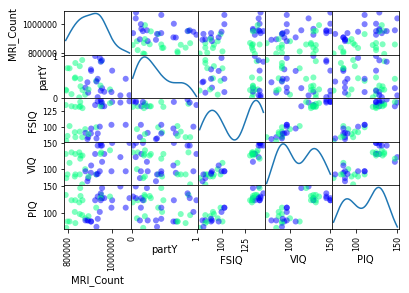

In [5]:
# Check out the data
pdplt.scatter_matrix(data[['MRI_Count', 'partY', 'FSIQ', 'VIQ', 'PIQ']], 
                     alpha=0.5,
                     diagonal='kde',
                     c=(data['Gender'] == 'Female'),
                     marker='o',
                     cmap='winter');

In [6]:
#Group IQ together and divide into 2 groups, smart and less smart. We hypothesize that people who score lower on IQ tests tend to score higher on the partY.
data['smarts_compounded'] = data['FSIQ'] + data['PIQ'] + data['VIQ']
smart_cat = []
for x in data['smarts_compounded']:
    if x > 350:
        smart_cat.append('Smart')
    else:
        smart_cat.append('Less Smart')
data['Smarts'] = smart_cat
data['Smarts'].astype('category')

#Remove outliers
partY = data['partY']
removed_outliers = partY.between(partY.quantile(.00), partY.quantile(.80))
index_names = data[~removed_outliers].index
data.drop(index_names, inplace=True)

Now that the data are clean, let's compare the Smart and Less Smart groups!

In [7]:
#T-Test
smart_partY = data[data['Smarts'] == 'Smart']['partY']
less_smart_partY = data[data['Smarts'] == 'Less Smart']['partY']
ttest = stats.ttest_ind(smart_partY, less_smart_partY)
print(ttest)

Ttest_indResult(statistic=-2.4139891455130154, pvalue=0.02208943916026429)


In [8]:
#Correlation
corr = stats.pearsonr(data['smarts_compounded'], data['partY'])
print(corr)

(-0.36369175840357204, 0.040739948278849365)


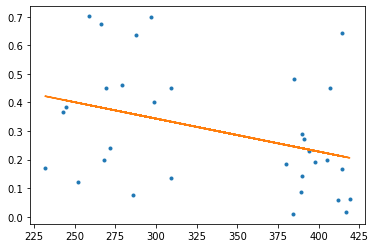

In [9]:
b, m = polyfit(data['smarts_compounded'], data['partY'], 1)
plt.plot(data['smarts_compounded'], data['partY'], '.')
plt.plot(data['smarts_compounded'], b + m * data['smarts_compounded'], '-')

## Conclusions
There is an inverse relationship between IQ measures and the partY score during virtual gatherings.

Let's run the analysis with a new dataset!

In [10]:
partY2 = data['partY2']
removed_outliers = partY2.between(partY2.quantile(.00), partY2.quantile(.88))
index_names = data[~removed_outliers].index
data.drop(index_names, inplace=True)
smart_partY = data[data['Smarts'] == 'Smart']['partY2']
less_smart_partY = data[data['Smarts'] == 'Less Smart']['partY2']
results = stats.ttest_ind(smart_partY, less_smart_partY)
print(results)
corr = stats.pearsonr(data['smarts_compounded'], data['partY2'])
print(corr)

Ttest_indResult(statistic=0.6264959455961162, pvalue=0.5364520667731316)
(0.17422574573126284, 0.3752442730917387)
